## Chapter 1.4
Analysis of poetry collections metadata (1835-1840)

In [159]:
library(tidyverse)

library(patchwork)
library(wesanderson)
theme_set(theme_minimal())

# fix problems with cyrillics
library(extrafont)
library(showtext)
font_add("Arial", "/Library/Fonts/Arial.ttf") 
showtext_auto()

pal <- c(wes_palette("Chevalier1")[4], # sand
         wes_palette("Royal1")[1], # grey
         wes_palette("Zissou1")[4], # yellow
         wes_palette("Royal1")[2] # red
        ) 

In [33]:
pb_full <- read.csv("../../data/01_4_poetry_books_1835_1840.csv") %>% 
    select(-X) %>%
    mutate(year = as.numeric(year),
          group = paste0(book_type, "_", genre),
          # cleaning of tagging artefacts
          group = str_replace_all(group, "(alm).*", "\\1"),
          group = str_remove_all(group, "; nar")) 

glimpse(pb_full)

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `year = as.numeric(year)`.
Caused by warning:
! pojawiły się wartości NA na skutek przekształcenia”


Rows: 1,105
Columns: 19
$ id               <int> 1143, 1147, 1167, 1151, 1257, 1250, 1245, 1168, 1223,…
$ COL_ID           <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ poetry_prose     <chr> "pr", "pr", "v", "pr", "v", "v", "v", "v", "v", "pr",…
$ book_type        <chr> "alm", "alm", "col", "alm", "col", "sep", "sep", "col…
$ genre            <chr> "", "", "lyr", "", "lyr", "nar", "lyr", "lyr", "lyr",…
$ special_tag      <chr> "", "", "", "", "", "", "", "", "", "", "", "", "", "…
$ author_sign      <chr> "Аладьин Е. (изд.)", "Аладьин Е. (изд.)", "Алипанов Е…
$ author           <chr> "Аладьин Е.В. (изд.)", "Аладьин Е.В. (изд.)", "Алипан…
$ author_full_name <chr> "Аладьин Егор Васильевич", "Аладьин Егор Васильевич",…
$ title            <chr> "Невский альманах на 1830 год, изд. Е. Аладьиным", "П…
$ city             <chr> "СПб.", "СПб.", "СПб.", "М.", "Ревель", "СПб.", "М.",…
$ publisher        <chr> "Плюшара", "Деп. народн. просвещ.", "Экс. загот. гос.…
$ year          

In [37]:
# number of books that can be potentially digitised
dig_groups <- pb_full %>%
    filter(digital_copy != "") %>% 
    count(group) %>% 
    rename(dig = n)

pb_full %>% 
    count(group) %>% 
    left_join(dig_groups, by = "group") %>% 
    mutate(perc = round( dig/n * 100, 1))

print("Totals")
dig <- pb %>% filter(digital_copy != "") %>% nrow
print(c("Books with digital copy:", dig))

total <- nrow(pb)
print(c("Total count:", total))

print(c("Percent available in digital copies:", round(dig/total*100, 1)))

print("Sources of digital copy:")
pb_full %>% 
    filter(digital_copy != "") %>%
    group_by(digital_copy) %>% 
    count(sort = T)

group,n,dig,perc
<chr>,<int>,<int>,<dbl>
alm,112,54,48.2
col_lyr,393,128,32.6
col_nar,20,10,50.0
sep_lyr,298,78,26.2
sep_nar,282,93,33.0


[1] "Totals"
[1] "Books with digital copy:" "363"                     
[1] "Total count:" "1105"        
[1] "Percent available in digital copies:"
[2] "32.9"                                
[1] "Sources of digital copy:"


digital_copy,n
<chr>,<int>
ЧБ,130
РГБ,96
РНБ,67
нб_спбгу,51
BN,7
google,4
KIVIKE,1
UT,1
archive.org,1


Warning message:
“Removed 1 rows containing missing values (`position_stack()`).”
Warning message:
“Removed 1 rows containing missing values (`position_stack()`).”


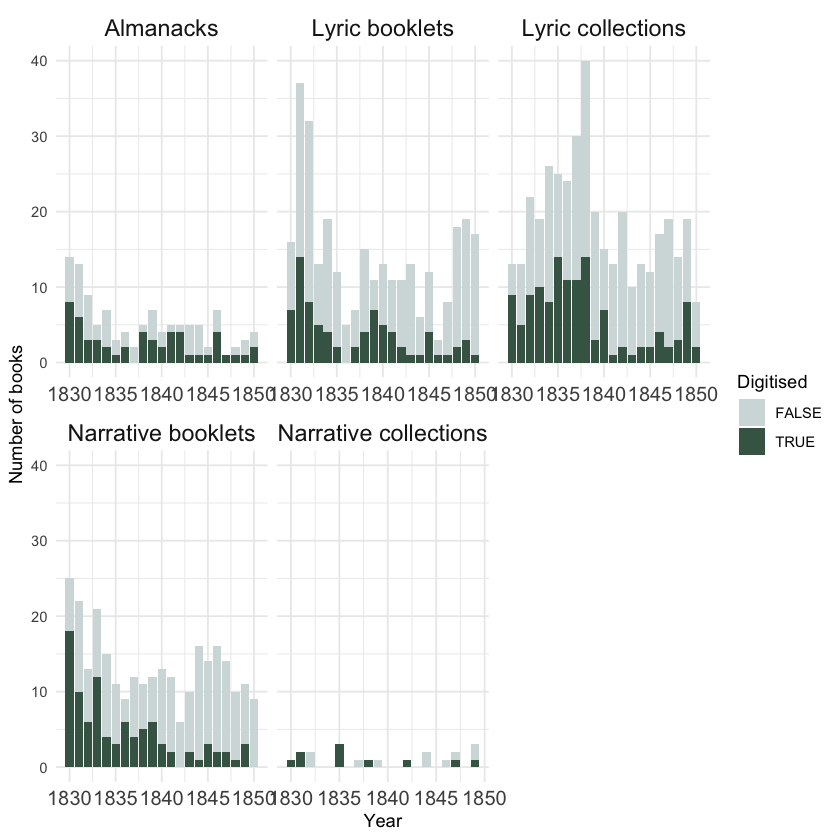

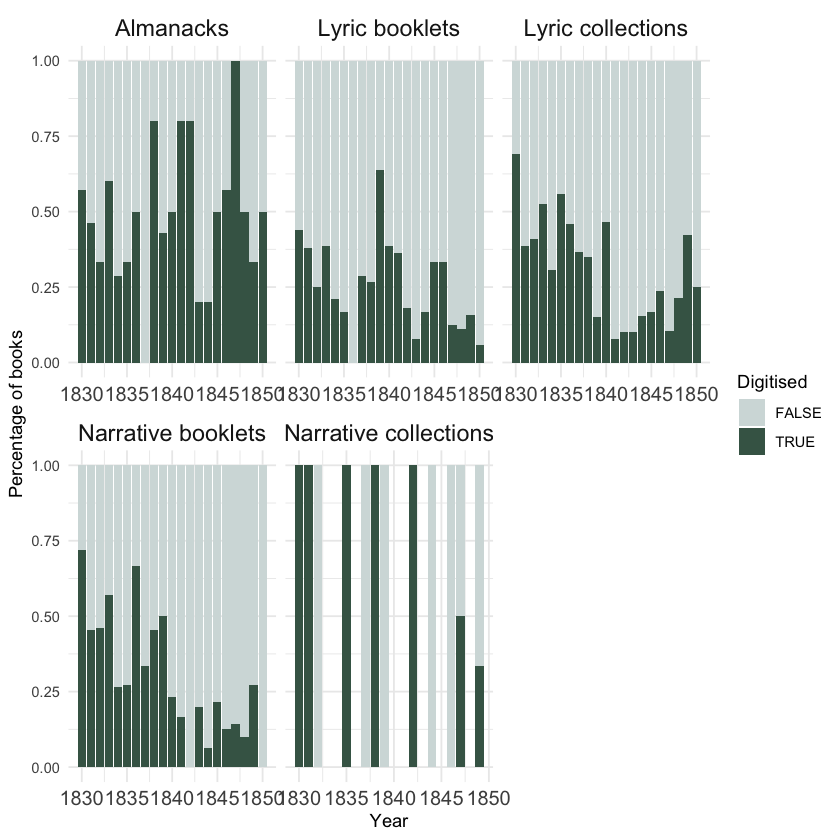

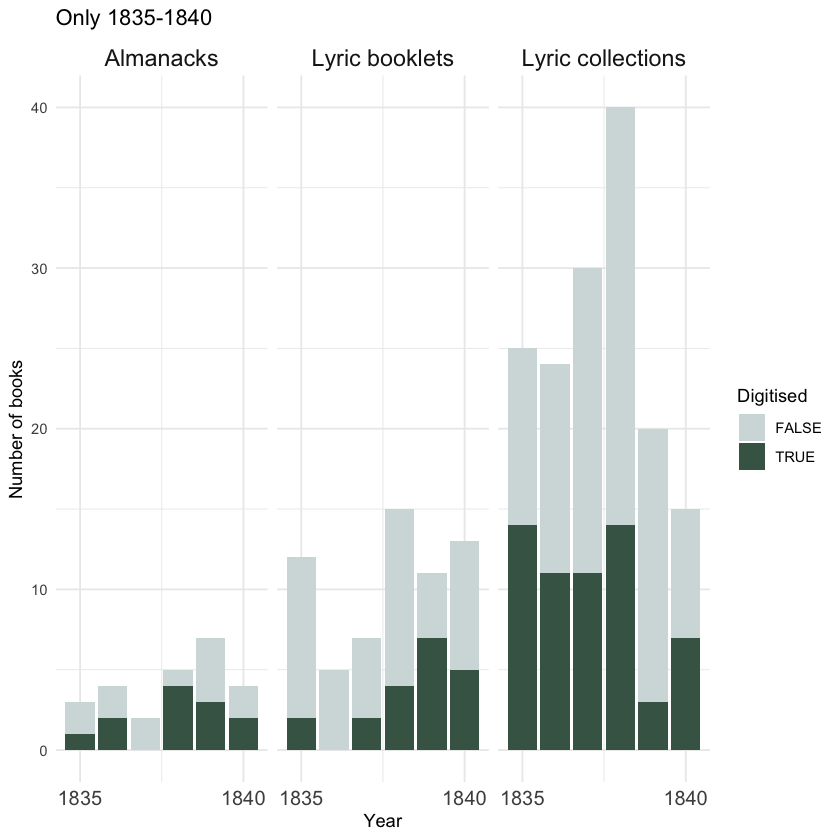

In [71]:
pb_full %>% 
    mutate(group = recode(group,
                         alm = "Almanacks",
                         col_lyr = "Lyric collections",
                         col_nar = "Narrative collections",
                         sep_nar = "Narrative booklets",
                         sep_lyr = "Lyric booklets")) %>%
    mutate(dig = ifelse(digital_copy == "", FALSE, TRUE)) %>%
    group_by(year, group, dig) %>% 
    count() %>%
    ggplot(aes(x = year, y = n, fill = as.factor(dig))) + 
        geom_col() + 
        facet_wrap(~group, scales = "free_x") + 
        scale_fill_manual(values = c(wes_palette("Chevalier1")[3],
                             wes_palette("Chevalier1")[1])) + 
        scale_x_continuous(breaks = seq(1830, 1850, 5)) +
        labs(x = "Year",
             y = "Number of books",
             fill = "Digitised") + 
        theme(axis.text.x = element_text(size = 12),
             strip.text = element_text(size = 14))

pb_full %>% 
    mutate(group = recode(group,
                         alm = "Almanacks",
                         col_lyr = "Lyric collections",
                         col_nar = "Narrative collections",
                         sep_nar = "Narrative booklets",
                         sep_lyr = "Lyric booklets")) %>%
    mutate(dig = ifelse(digital_copy == "", FALSE, TRUE)) %>%
    group_by(year, group, dig) %>% 
    count() %>%
    ggplot(aes(x = year, y = n, fill = as.factor(dig))) + 
        geom_col(position = "fill") + 
        facet_wrap(~group, scales = "free_x") + 
        scale_fill_manual(values = c(wes_palette("Chevalier1")[3],
                             wes_palette("Chevalier1")[1])) + 
        scale_x_continuous(breaks = seq(1830, 1850, 5)) +
        labs(x = "Year",
             y = "Percentage of books",
             fill = "Digitised") + 
        theme(axis.text.x = element_text(size = 12),
             strip.text = element_text(size = 14))

pb_full %>% 
    filter(year > 1834 & year < 1841) %>%
    filter(str_detect(group, "lyr|alm")) %>% 
    mutate(group = recode(group,
                         alm = "Almanacks",
                         col_lyr = "Lyric collections",
                         col_nar = "Narrative collections",
                         sep_nar = "Narrative booklets",
                         sep_lyr = "Lyric booklets")) %>%
    mutate(dig = ifelse(digital_copy == "", FALSE, TRUE)) %>%
    group_by(year, group, dig) %>% 
    count() %>%
    ggplot(aes(x = year, y = n, fill = as.factor(dig))) + 
        geom_col() + 
        facet_wrap(~group, scales = "free_x") + 
        scale_fill_manual(values = c(wes_palette("Chevalier1")[3],
                             wes_palette("Chevalier1")[1])) + 
        scale_x_continuous(breaks = seq(1830, 1850, 5)) +
        labs(title = "Only 1835-1840",
             x = "Year",
             y = "Number of books",
             fill = "Digitised") + 
        theme(axis.text.x = element_text(size = 12),
             strip.text = element_text(size = 14))

### Clean metadata with only lyric poetry between 1835 and 1840

In [190]:
pb <- pb_full %>% 
    filter(year > 1834 & year < 1841) %>% 

    # remove completely unknown books (not found either in 19-c. catalogues nor in modern ones)
    filter(special_tag != "unknown") %>%
    
    # for now I also filter out all narrative poems!
    filter(!str_detect(group, "nar")) %>%
    
    # recode group names
    mutate(group_abbr = group,
        group = recode(group,
                         alm = "Almanacks",
                         col_lyr = "Lyric collections",
                         col_nar = "Narrative collections",
                         sep_nar = "Narrative booklets",
                         sep_lyr = "Lyric booklets"),
          group_rus = recode(group_abbr,
                            alm = "Альманахи",
                            col_lyr = "Сборники стихотворений",
                         col_nar = "Сборники поэм",
                         sep_nar = "Отд. поэмы",
                         sep_lyr = "Отд. стихотворения")) %>% 
    
    # fill author's names if unavailable
    mutate(author = ifelse(author == "" & author_sign != "", author_sign, author))

In [191]:
# test how many books are containing prose (except for almanacks)
pb %>%
    filter(poetry_prose == "pr" & book_type != "alm")

id,COL_ID,poetry_prose,book_type,genre,special_tag,author_sign,author,author_full_name,title,⋯,publisher,year,pages,size_fold,size_cm,digital_copy,digital_copy_URL,group,group_abbr,group_rus
<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<dbl>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
69,COL_3,pr,col,lyr,,Венгер Н.,Венгер Н.,Венгер Николай,Сочинения Николая Венгера в стихах и прозе,⋯,Селивановского,1835,68,12,20,,drive/photos/17,Lyric collections,col_lyr,Сборники стихотворений
74,NA,pr,col,lyr,,Лебедев В. (изд.),Лебедев В.,,"Осенний вечер: [Сб. рассказов и стихов], изданный В. Лебедевым",⋯,Вингебера,1835,238,12,18,ЧБ,https://books.google.com/books?id=0z1M1S2mJFkC&printsec=frontcover&source=gbs_ViewAPI,Lyric collections,col_lyr,Сборники стихотворений
124,COL_38,pr,col,lyr,,Кульчицкий А.,Кульчицкий А.,Кульчицкий Александр Яковлевич,Надежда. Собрание сочинений в стихах и прозе / Изд. А. Кульчицкий [Студ. сб.],⋯,Ун. тип,1836,284,8,20,,drive/photos/17,Lyric collections,col_lyr,Сборники стихотворений
107,COL_24,pr,col,lyr,,Лавров Н.,Лавров Н.,Лавров Н.,"Нравственные результаты XIX века, и стихотворения. Соч. Н. Лаврова",⋯,Вингебера,1836,73,8,26,,drive/photos/15,Lyric collections,col_lyr,Сборники стихотворений
131,COL_206,pr,col,lyr,,Щукин К.,Щукин К.,Щукин К.,Литературные занятия,⋯,Акад. наук,1836,252,8,20,ЧБ,https://books.google.com/books?id=Y0c64PMcHJQC&printsec=frontcover&source=gbs_ViewAPI,Lyric collections,col_lyr,Сборники стихотворений
185,COL_60,pr,col,lyr,,Аладьина Е.В.,Аладьина Е.В.,Аладьина Елизавета Васильевна,Сочинения Е.В.А…,⋯,Вингебера,1838,24,,24,РГБ,https://dlib.rsl.ru/01003559619,Lyric collections,col_lyr,Сборники стихотворений
241,COL_169,pr,col,lyr,,Башкатов А.,Башкатов А.,Башкатов Алексей Васильевич,"Быль и заблуждение моего ума и сердца. Соч. Алексея Башкатова, в стихах и прозе",⋯,Евреинова,1838,303,8,23,ЧБ,https://books.google.com/books?id=Knddqqf_Y_sC&printsec=frontcover&source=gbs_ViewAPI,Lyric collections,col_lyr,Сборники стихотворений
190,COL_62,pr,col,lyr,,Бестужев А.А. (Марлинский),Бестужев А.А. (Марлинский),Бестужев Александр Александрович,Полное собрание сочинений А. Марлинского. Ч. 11. Стихотворения и полемические статьи / Изд. 3-е,⋯,III Отд. собств. Е.И.В. канц.,1838,354,,20,нб_спбгу,http://old.library.spbu.ru/dcol/jsp/RcWebImageViewer.jsp?doc_id=ad3db2a1-c807-461d-a5a8-c6905de40f77/libspbgu/00000001/00000473&pg_seq=1&search_doc=,Lyric collections,col_lyr,Сборники стихотворений
191,NA,pr,col,lyr,,Бобылев Н.И.,Бобылев Н.И.,Бобылев Николай Иванович,Невский альбом: Опыты в стихах и прозе,⋯,Воен. тип.,1838,282,16,13,ЧБ,https://books.google.com/books?id=wDV_4kS887UC&printsec=frontcover&source=gbs_ViewAPI,Lyric collections,col_lyr,Сборники стихотворений


In [192]:
pb %>% 
    count(group)

group,n
<chr>,<int>
Almanacks,25
Lyric booklets,54
Lyric collections,139


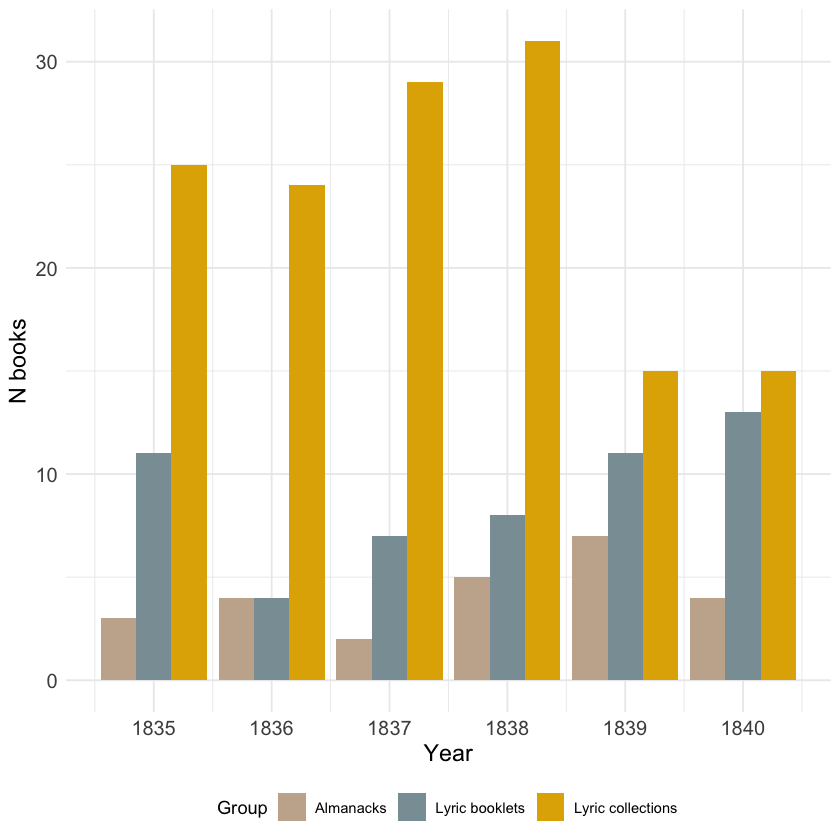

In [193]:
pb %>% 
    group_by(group, year) %>% 
    count() %>%
    ggplot(aes(x = year, y = n,# color = group, 
               fill = group)) + 
        # geom_line() + geom_point() +
        #facet_wrap(~group, scales = "fixed") +
        geom_col(position = "dodge", size = .2) + 
        scale_fill_manual(values = pal) + 
        scale_x_continuous(breaks = seq(1835,1840,1)) +
        theme(
            legend.position = "bottom",
            axis.title = element_text(size = 14),
            axis.text = element_text(size = 12),
            strip.text = element_text(size = 16)
        ) + 
        labs(x = "Year", y = "N books", fill = "Group") 


p <- pb %>% 
    group_by(group_rus, year) %>% 
    count() %>%
    ggplot(aes(x = year, y = n,# color = group, 
               fill = group_rus)) + 
        # geom_line() + geom_point() +
        #facet_wrap(~group_rus, scales = "free_x") +
        geom_col(position = "dodge", size = .2) + 
        scale_fill_manual(values = pal) + 
        scale_x_continuous(breaks = seq(1835,1840,1)) +
        theme(
            legend.position = "bottom",
            axis.title = element_text(size = 14),
            axis.text = element_text(size = 12),
            strip.text = element_text(size = 16)
        ) + 
        labs(x = "Год", y = "Количество книг", fill = "")

ggsave(file = "plots/Fig_1-4-1.png", plot = p, dpi = 300,
    width = 8, height = 6, bg = "white")

In [194]:
glimpse(pb)

Rows: 218
Columns: 21
$ id               <int> 688, 68, 849, 90, 682, 69, 83, 689, 70, 91, 92, 342, …
$ COL_ID           <chr> NA, "COL_2", NA, "COL_200", NA, "COL_3", "COL_13", NA…
$ poetry_prose     <chr> "v", "v", "v", "v", "v", "pr", "v", "v", "v", "v", "v…
$ book_type        <chr> "sep", "col", "sep", "col", "sep", "col", "col", "sep…
$ genre            <chr> "lyr", "lyr", "lyr", "lyr", "lyr", "lyr", "lyr", "lyr…
$ special_tag      <chr> "", "", "", "", "", "", "", "", "", "", "", "", "", "…
$ author_sign      <chr> "Аксаков К.", "Баратынский Е.", "Бём А.", "Бенедиктов…
$ author           <chr> "Аксаков К.С.", "Баратынский Е.А.", "Бём А.", "Бенеди…
$ author_full_name <chr> "Аксаков Константин Сергеевич", "Баратынский Евгений …
$ title            <chr> "Стихи, читанные в день празднования учреждения Импер…
$ city             <chr> "М.", "М.", "СПб.", "СПб.", "Ревель", "М.", "Харьков"…
$ publisher        <chr> "Ун. тип", "Семена", "Гинце", "Вингебера", "", "Селив…
$ year            

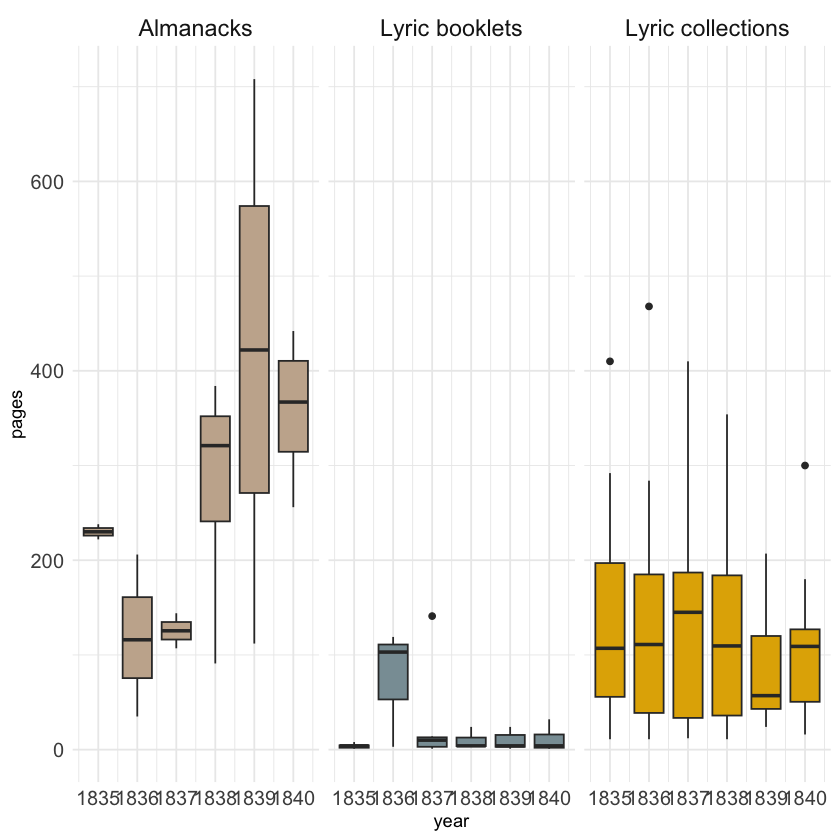

In [195]:
pb %>% 
    filter(!is.na(pages)) %>%
    ggplot(aes(x = year, y = pages, group = year, 
               #color = group, 
               fill = group)) + 
        geom_boxplot() + 
        facet_wrap(~group) + 
        scale_x_continuous(breaks = seq(1835, 1840, 1)) +
        scale_fill_manual(values = pal) + 
        theme(
            legend.position = "None",
            axis.text = element_text(size = 12),
            strip.text = element_text(size = 14)
        )

p <- pb %>% 
    filter(!is.na(pages)) %>%
    ggplot(aes(x = year, y = pages, group = year, 
               #color = group, 
               fill = group_rus)) + 
        geom_boxplot() + 
        facet_wrap(~group_rus) + 
        
        scale_x_continuous(breaks = seq(1835, 1840, 1)) +
        scale_fill_manual(values = pal) + 
        theme(
            legend.position = "None",
            axis.text = element_text(size = 12),
            axis.text.x = element_blank(), # removed years from x axis for the upper plot
            strip.text = element_text(size = 14)
        ) + 
        labs(x = "", y = "Количество страниц")


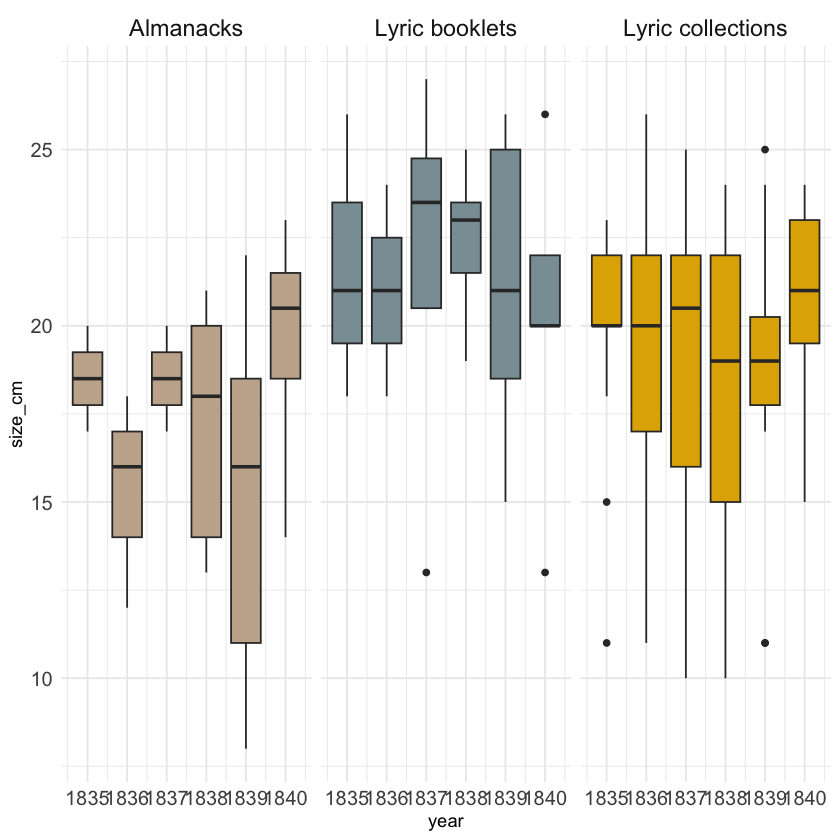

In [196]:
pb %>% 
    filter(!is.na(size_cm)) %>% 
    ggplot(aes(x = year, y = size_cm, group = year, fill = group)) + 
        geom_boxplot() + 
        facet_wrap(~group) + 
        scale_x_continuous(breaks = seq(1835, 1840, 1)) +
        scale_fill_manual(values = pal) + 
        theme(
            legend.position = "None",
            axis.text = element_text(size = 12),
            strip.text = element_text(size = 14)
        )

p2 <- pb %>% 
    filter(!is.na(size_cm)) %>% 
    ggplot(aes(x = year, y = size_cm, group = year, fill = group_rus)) + 
        geom_boxplot() + 
        facet_wrap(~group_rus) + 
        scale_x_continuous(breaks = seq(1835, 1840, 1)) +
        scale_fill_manual(values = pal) + 
        theme(
            legend.position = "None",
            axis.text = element_text(size = 12),
            strip.text = element_blank() # remove facet labels for lower plot
        ) + 
        labs(x = "Год", y = "Размер в сантиметрах")

In [197]:
p3 <- p / p2

ggsave("plots/Fig_1-4-2.png", plot = p3, dpi = 300, bg = "white",
      width = 10, height = 8)

rm(p, p2, p3)

### Lyrical collections

In [198]:
lyr <- pb %>% 
    filter(group_abbr == "col_lyr" & special_tag != "unknown")
glimpse(lyr)

Rows: 139
Columns: 21
$ id               <int> 68, 90, 69, 83, 70, 91, 92, 342, 71, 73, 633, 74, 133…
$ COL_ID           <chr> "COL_2", "COL_200", "COL_3", "COL_13", "COL_4", NA, "…
$ poetry_prose     <chr> "v", "v", "pr", "v", "v", "v", "v", "v", "v", "v", "v…
$ book_type        <chr> "col", "col", "col", "col", "col", "col", "col", "col…
$ genre            <chr> "lyr", "lyr", "lyr", "lyr", "lyr", "lyr; nar", "lyr",…
$ special_tag      <chr> "", "", "", "", "", "", "", "", "", "", "double", "",…
$ author_sign      <chr> "Баратынский Е.", "Бенедиктов В.", "Венгер Н.", "Геев…
$ author           <chr> "Баратынский Е.А.", "Бенедиктов В.Г.", "Венгер Н.", "…
$ author_full_name <chr> "Баратынский Евгений Абрамович", "Бенедиктов Владимир…
$ title            <chr> "Сочинения Е. Баратынского: В 2 ч.", "Стихотворения В…
$ city             <chr> "М.", "СПб.", "М.", "Харьков", "СПб.", "СПб.", "СПб."…
$ publisher        <chr> "Семена", "Вингебера", "Селивановского", "Ун. тип", "…
$ year            

In [199]:
lyr %>% 
    filter(author != "") %>% 
    count(author, sort = T) %>% head(15)

,author,n
,<chr>,<int>
1,Крылов И.А.,4
2,Бенедиктов В.Г.,3
3,Демидов М.А.,3
4,Зилов А.М.,3
5,Максимов М.И.,3
6,Меркли М.М.,3
7,Полежаев А.И.,3
8,Пуговишников А.М.,3
9,Пушкин А.С.,3


In [200]:
print("the smallest lyric collections:")
lyr %>% 
    select(author, title, publisher, year, pages, size_fold, size_cm) %>%
    arrange(-desc(size_cm)) %>% head(10)

[1] "the smallest lyric collections:"


,author,title,publisher,year,pages,size_fold,size_cm
,<chr>,<chr>,<chr>,<dbl>,<int>,<chr>,<int>
1,Крылов И.А.,Басни Ивана Крылова : В 8 кн. 32-я тыс.,Смирдина,1837,410,8,10
2,Крылов И.А.,Басни Ивана Крылова : В восьми книгах. - 33-я тыс.,Смирдина,1837,410,8,10
3,Дмитриев И.И.,Басни и апологи И.И. Дмитриева,Воен. тип.,1838,178,32,10
4,Крылов И.А.,Басни Ивана Крылова : В 8 кн. 30-я тысяча.,Смирдина,1835,410,4,11
5,А. Ф. Ф.,Роза и Василек. Соч. А.Ф.Ф.,Экс. загот. гос. бумаг,1836,11,,11
6,Баласогло А.П.<?>,Стихотворения Веронова,Сахарова,1838,209,8,11
7,Данков И.И.,Блины. Соч. И. Д.: Стихотворения,Ун. тип,1839,37,,11
8,Данков И.И.,Красное яичко или Светлодневный подарок москвичам : [Сб. стихотворений],Ун. тип,1839,57,,11
9,Полежаев А.И.,Кальян. Стихотворения Полежаева / Изд. 3,Алексеев,1838,186,,12


In [201]:
print("The most thick lyric collections:")
lyr %>% 
    select(author, title, publisher, year, pages, size_fold, size_cm) %>%
    arrange(desc(pages)) %>% head(10)

[1] "The most thick lyric collections:"


,author,title,publisher,year,pages,size_fold,size_cm
,<chr>,<chr>,<chr>,<dbl>,<int>,<chr>,<int>
1,Кашкин Д.Е.,Сочинения Дмитрия Кашкина: В 3 т. Т. 1,Степанова,1836,468,8,21
2,Крылов И.А.,Басни Ивана Крылова : В 8 кн. 30-я тысяча.,Смирдина,1835,410,4,11
3,Крылов И.А.,Басни Ивана Крылова : В 8 кн. 32-я тыс.,Смирдина,1837,410,8,10
4,Крылов И.А.,Басни Ивана Крылова : В восьми книгах. - 33-я тыс.,Смирдина,1837,410,8,10
5,Бестужев А.А. (Марлинский),Полное собрание сочинений А. Марлинского. Ч. 11. Стихотворения и полемические статьи / Изд. 3-е,III Отд. собств. Е.И.В. канц.,1838,354,,20
6,Тимофеев А.В.,Опыты. В 3 ч. Ч. 1. [Стихотворения],Н. Глазунова,1837,347,8,22
7,Башкатов А.,"Быль и заблуждение моего ума и сердца. Соч. Алексея Башкатова, в стихах и прозе",Евреинова,1838,303,8,23
8,Крылов И.А.,Басни Ивана Крылова : В 8 кн. 40-я тысяча.,Плюшара,1840,300,,23
9,Жуковский В.А.,Стихотворения Василья Жуковского: В 8 ч. / Изд. 4-е. Т. 1. Орлеанская дева; лирические стихотворения,Экс. загот. гос. бумаг,1835,292,,22


### Typographies

In [234]:
sort(unique(pb$publisher)) # need to be cleaned

#'В город. т.' = 'Городская тип.'
# 'Н. Глазунова' = 'Глазунова' = 'Глазунова и Ко'
# 'Праца' = 'Праца и К.'

[1] ""                               "3 Деп. М-ва гос. имуществ"     
 [3] "III Отд. собств. Е.И.В. канц."  "druck. von C. Krav"            
 [5] "А. Смирдина, И. Глазунова и Ко" "Акад. наук"                    
 [7] "Алексеев"                       "Алипанова"                     
 [9] "В город. т."                    "Вингебера"                     
[11] "Воейкова и Ко"                  "Воен. тип."                    
[13] "Гинце"                          "Глазунова"                     
[15] "Глазунова и Ко"                 "Гликсберга"                    
[17] "Городская тип."                 "Грен"                          
[19] "Греча"                          "Губ. правления"                
[21] "Губ. тип."                      "Гутенбергова тип."             
[23] "Деп. внешней торговли"          "Евреинова"                     
[25] "Изд. Энц. Лексик. А. Плюшара"   "Кирилова"                      
[27] "Крайя"                          "Крылова"                       
[29] "Крыловского"                    "Лаакманна"                     
[31] "Лазаревых"                      "Мехитаристöв"                  
[33] "Морск. тип."                    "Н. Глазунова"                  
[35] "Неймана"                        "Пеца"                          
[37] "Плюшара"                        "Пономарева"                    
[39] "Праца"                          "Праца и К."                    
[41] "Сахарова"                       "Селивановского"                
[43] "Семена"                         "Смирдина"                      
[45] "Смирнова"                       "Снегирева"                     
[47] "Степанова"                      "Ун. тип"                       
[49] "Фишера"                         "Шмицдорф"                      
[51] "Штаба отд. корп. внутр. стражи" "Экс. загот. гос. бумаг"        
[53] "Эрнста"

In [295]:
top_typos <- pb_full %>% 
    mutate(typo = paste0(city, ": ", publisher)) %>% 
    count(typo, sort = T) %>% 
    filter(n > 15 & typo != ": ") %>% 
    select(typo) %>% pull

pb_full %>% 
    mutate(typo = paste0(city, ": ", publisher)) %>% 
    count(typo, sort = T) %>% summary

     typo                 n         
 Length:148         Min.   : 1.000  
 Class :character   1st Qu.: 1.000  
 Mode  :character   Median : 2.000  
                    Mean   : 7.466  
                    3rd Qu.: 6.000  
                    Max.   :84.000  

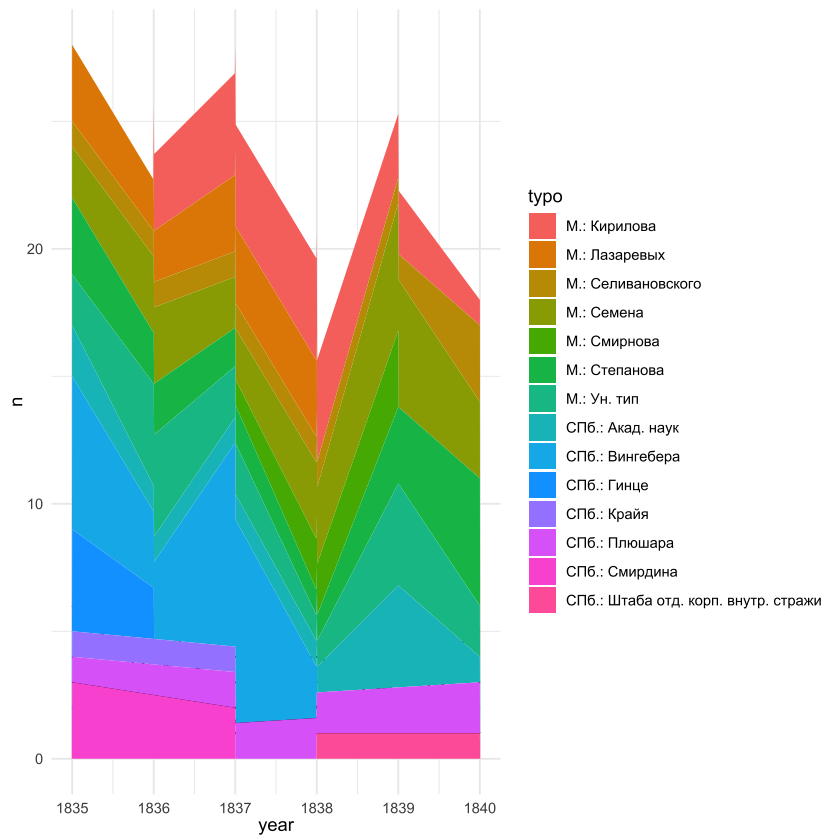

In [296]:
pb %>% 
    mutate(typo = paste0(city, ": ", publisher)) %>% 
    filter(typo %in% top_typos) %>%
    group_by(year, typo) %>% 
    count(sort = T) %>% 
    ggplot(aes(x = year, y = n, fill = typo
              )) + 
    geom_line() + 
    geom_area() + 
    theme(#legend.position = "None",
         text = element_text(family = "Arial"))

In [297]:
# mb to count not the absolute value of books each year, but cumulative?

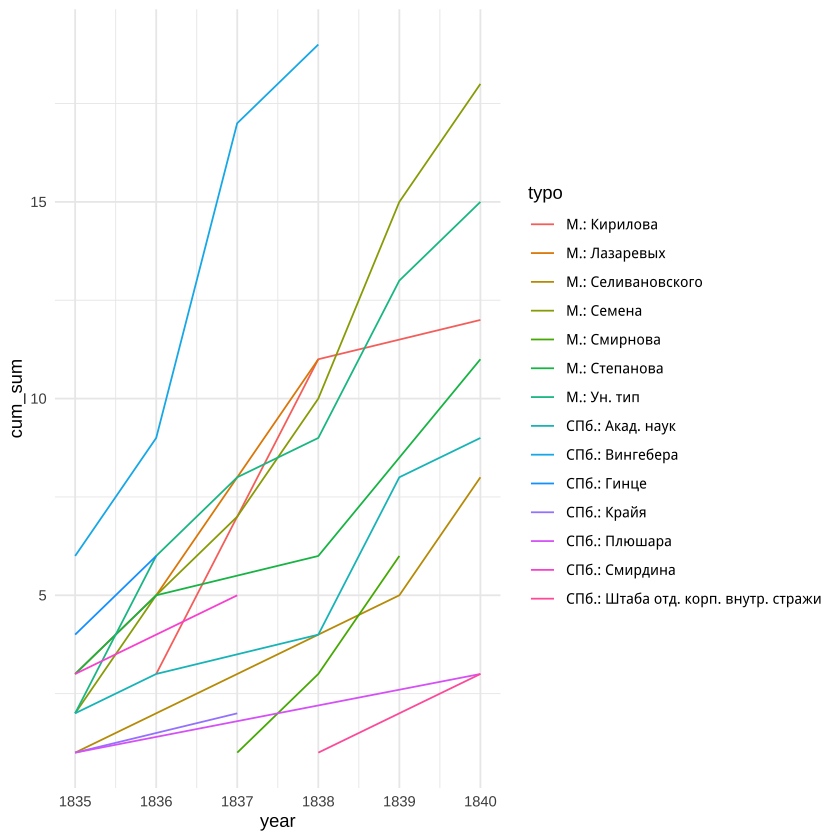

In [298]:
pb %>% 
    mutate(typo = paste0(city, ": ", publisher)) %>% 
    filter(typo %in% top_typos) %>%
    count(typo, year, sort = T) %>% 
    ungroup() %>% 
    arrange(-desc(year)) %>%
    group_by(typo) %>% 
    mutate(cum_sum = cumsum(n)) %>% 
    ggplot(aes(x = year, y = cum_sum, color = typo)) + 
        geom_line()

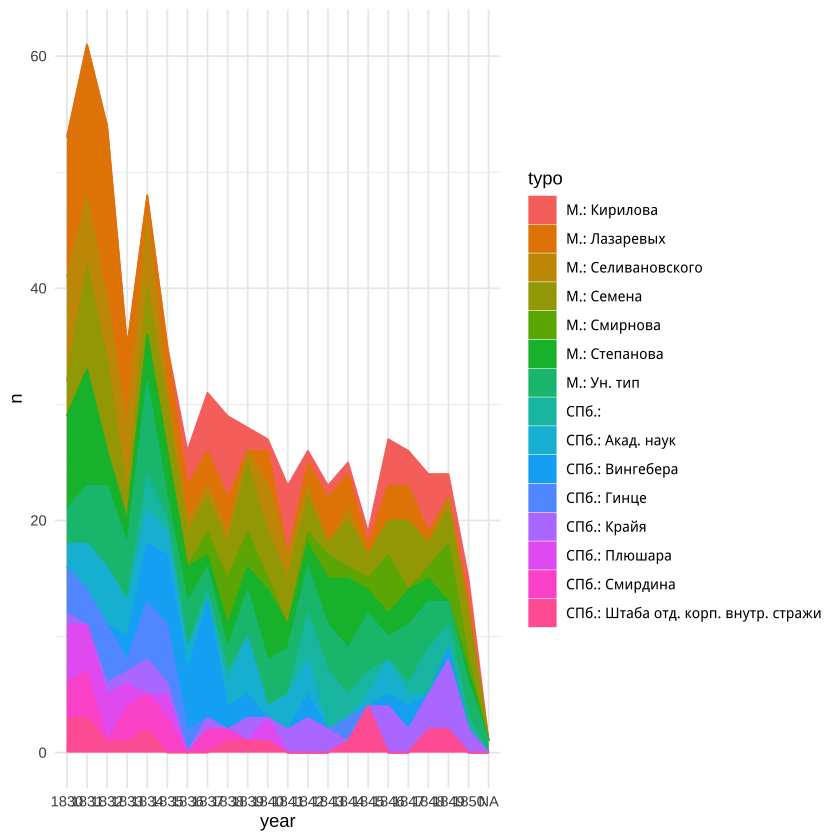

In [299]:
pb_full %>% 
    mutate(typo = paste0(city, ": ", publisher)) %>% 
    filter(typo %in% top_typos) %>%
    count(typo, year, sort = T) %>% 
    ungroup() %>% 
    pivot_wider(names_from = year, values_from = n) %>%
    mutate_if(is.numeric, ~replace_na(., 0)) %>%
    pivot_longer(!typo, names_to = "year", values_to = "n") %>% 
    arrange(-desc(year)) %>%
    group_by(typo) %>% 
    mutate(cum_sum = cumsum(n)) %>% 
    ggplot(aes(x = year, y = n, color = typo, group = typo, fill = typo)) + 
        #geom_line() + 
        geom_area()

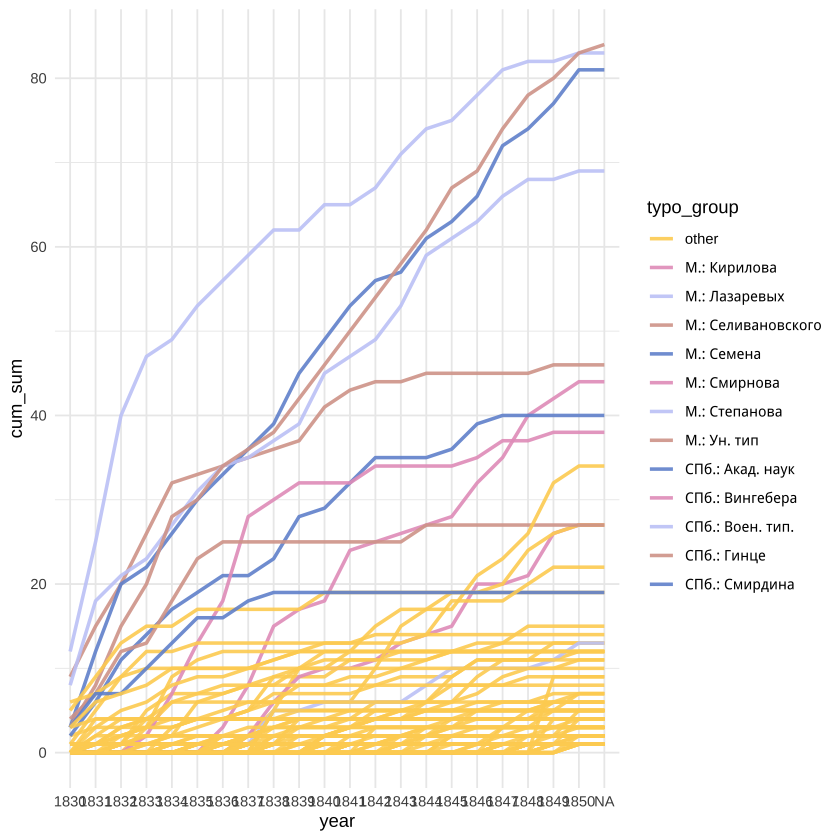

In [333]:
pb_full %>% 
    mutate(typo = paste0(city, ": ", publisher)) %>% 
    #filter(typo %in% top_typos) %>%
    count(typo, year, sort = T) %>% 
    ungroup() %>% 
    pivot_wider(names_from = year, values_from = n) %>%
    mutate_if(is.numeric, ~replace_na(., 0)) %>%
    pivot_longer(!typo, names_to = "year", values_to = "n") %>% 
    arrange(-desc(year)) %>%
    group_by(typo) %>% 
    mutate(cum_sum = cumsum(n),
          typo_group = ifelse(typo %in% top_typos_35, typo, "other")) %>% 
    ggplot(aes(x = year, y = cum_sum, color = typo_group, 
               group = typo)) + 
        geom_line(alpha = 0.9, linewidth = 1) + 
        scale_colour_manual(values = c(wes_palette("Chevalier1")[2],
                                  rep(wes_palette("GrandBudapest2"), 3)))

# https://r-graph-gallery.com/web-line-chart-small-multiple-all-group-greyed-out.html

In [294]:
top_typos_35 <- pb %>% 
    mutate(typo = paste0(city, ": ", publisher)) %>% 
    count(typo, sort = T) %>% 
    filter(n > 4 & typo != ": ") %>% 
    select(typo) %>% pull

top_typos_35
length(top_typos_35)

pb %>% 
    mutate(typo = paste0(city, ": ", publisher)) %>% 
    count(typo, sort = T) %>% summary

[1] "СПб.: Вингебера"    "М.: Семена"         "М.: Ун. тип"       
 [4] "М.: Кирилова"       "М.: Лазаревых"      "М.: Степанова"     
 [7] "СПб.: Акад. наук"   "М.: Селивановского" "М.: Смирнова"      
[10] "СПб.: Гинце"        "СПб.: Воен. тип."   "СПб.: Смирдина"

[1] 12

     typo                 n         
 Length:62          Min.   : 1.000  
 Class :character   1st Qu.: 1.000  
 Mode  :character   Median : 2.000  
                    Mean   : 3.516  
                    3rd Qu.: 3.750  
                    Max.   :19.000  

In [ ]:
pb %>% 
    mutate(typo = paste0(city, ": ", publisher)) %>% 
    filter(typo %in% top_typos) %>%
    count(typo, year, sort = T) %>% 
    ungroup() %>% 
    pivot_wider(names_from = year, values_from = n) %>%
    mutate_if(is.numeric, ~replace_na(., 0)) %>%
    pivot_longer(!typo, names_to = "year", values_to = "n") %>% 
    arrange(-desc(year)) %>%
    group_by(typo) %>% 
    mutate(cum_sum = cumsum(n)) %>% 
    ggplot(aes(x = year, y = n, color = typo, group = typo, fill = typo)) + 
        #geom_line() + 
        geom_area()

pb %>% 
    mutate(typo = paste0(city, ": ", publisher)) %>% 
    filter(typo %in% top_typos) %>%
    count(typo, year, sort = T) %>% 
    ungroup() %>% 
    pivot_wider(names_from = year, values_from = n) %>%
    mutate_if(is.numeric, ~replace_na(., 0)) %>%
    pivot_longer(!typo, names_to = "year", values_to = "n") %>% 
    arrange(-desc(year)) %>%
    group_by(typo) %>% 
    mutate(cum_sum = cumsum(n)) %>% 
    ggplot(aes(x = year, y = cum_sum, color = typo, group = typo, fill = typo)) + 
        geom_line() #+ 
        #geom_area()